In [1]:
import meanz_modules as mzmod
import rubin_sim
import rubin_sim.maf as maf
from rubin_sim.scheduler.utils import SkyAreaGenerator
from rubin_sim.data import get_baseline

from os import path

opsim_fname = rubin_sim.data.get_baseline()
run_name = path.splitext(path.basename(opsim_fname))[0]
nside=64


In [2]:
# # Apply the above routine to our baseline sim, and show the plots
bgroup, bd = mzmod.metric_plots(run_name, opsim_fname, year=2,nside=nside)
bgroup.plot_all(closefigs=True)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


In [3]:
ilim = [24.1, 25.3]
meanz = [0.92, 1.08]

a,b = mzmod.coeff_solve(ilim,meanz)
print(a,b)

0.044444444444444446 -0.7644444444444444


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


### Dataset definitions

In [4]:
v33_sim_list = ['/pscratch/sd/r/rhlozek/rubin_sim_data/sim_baseline/baseline_v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/noroll_v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid1_const_season6v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid1_const_season2v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid1_const_season4v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid2_const_season2v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid2_const_season4v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid2_const_season6v3.3_10yrs.db',]
v33_name_list = [path.splitext(path.basename(sim))[0] for sim in v33_sim_list]
print(v33_name_list)

['baseline_v3.3_10yrs', 'noroll_v3.3_10yrs', 'roll_mid1_const_season6v3.3_10yrs', 'roll_mid1_const_season2v3.3_10yrs', 'roll_mid1_const_season4v3.3_10yrs', 'roll_mid2_const_season2v3.3_10yrs', 'roll_mid2_const_season4v3.3_10yrs', 'roll_mid2_const_season6v3.3_10yrs']


## In this section, we get maps of the i-band depth across the survey for v3.3 simulations at year=3

In [5]:
# # Run our above routine for the v3.3 simulations at year 3
# for i in range(len(v33_sim_list)):
#     this_run = v33_sim_list[i]
#     this_fname = v33_name_list[i]
#     bgroup, bd = mzmod.metric_plots(this_fname, this_run, year=3)
#     #bgroup.plot_all(closefigs=False)

### In this section, we run our metric calculations at each year for all v3.3 simulations and produce a dataframe to save to disk.

In [8]:
import numpy as np
import pandas as pd
import importlib
importlib.reload(mzmod)

v33_sim_list = ['/pscratch/sd/r/rhlozek/rubin_sim_data/sim_baseline/baseline_v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/noroll_v3.3_10yrs.db',
             '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid1_const_season4v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid2_const_season2v3.3_10yrs.db']
v33_name_list = [path.splitext(path.basename(sim))[0] for sim in v33_sim_list]
nums =len(v33_name_list)
v33_df = mzmod.get_year_by_year_metrics_jn(np.arange(1,10), v33_name_list[:nums], v33_sim_list[:nums])
display(v33_df)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


results_1.feather
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:375: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


results_1.feather
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:375: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


results_1.feather
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:375: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


results_1.feather
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:375: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


results_2.feather
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:375: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


results_2.feather
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:375: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


results_2.feather
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:375: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


results_2.feather
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:375: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


results_3.feather
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:375: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


results_3.feather
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:375: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


results_3.feather
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:375: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


results_3.feather
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:375: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


results_4.feather
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:375: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


results_4.feather
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:375: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


results_4.feather
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:375: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


results_4.feather
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:375: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


results_5.feather
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:375: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


results_5.feather
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:375: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


results_5.feather
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:375: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


results_5.feather
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:375: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


results_6.feather
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:375: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


results_6.feather
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:375: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


results_6.feather
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:375: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


results_6.feather
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:375: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


results_7.feather
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:375: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


results_7.feather
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:375: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


results_7.feather
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:375: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


results_7.feather
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:375: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


results_8.feather
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:375: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


results_8.feather
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:375: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


results_8.feather
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:375: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


results_8.feather
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:375: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


results_9.feather
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:375: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


results_9.feather
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:375: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


results_9.feather
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:375: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


results_9.feather


/pscratch/sd/r/rhlozek/ObsStrat/code/meanz_uniformity/meanz_modules.py:375: RankWarning: Polyfit may be poorly conditioned
  clbias, meanz_use = compute_Clbias(meanzinterp,stdz)


,Strategy,Year,Median i-band depth,Mean i-band depth,Std i-band depth,IQR i-band depth,Mean z,Std z,Clbias,Used meanz
0,baseline_v3.3_10yrs,1,25.252161,25.233240,0.184610,0.235948,[0.866354169538206],[0.0016245211763601293],[0.0006535667585274868],[0.866354169538206]
1,noroll_v3.3_10yrs,1,25.252161,25.233240,0.184610,0.235948,[0.866354169538206],[0.0016245211763601293],[0.0006535667585274868],[0.866354169538206]
2,roll_mid1_const_season4v3.3_10yrs,1,25.252161,25.233240,0.184610,0.235948,[0.866354169538206],[0.0016245211763601293],[0.0006535667585274868],[0.866354169538206]
3,roll_mid2_const_season2v3.3_10yrs,1,25.252161,25.233240,0.184610,0.235948,[0.866354169538206],[0.0016245211763601293],[0.0006535667585274868],[0.866354169538206]
4,baseline_v3.3_10yrs,2,25.635288,25.598740,0.197662,0.260341,[0.9014094749919175],[0.0017459151126265917],[0.0007648611361907208],[0.9014094749919175]
5,noroll_v3.3_10yrs,2,25.626280,25.601309,0.170386,0.215176,[0.9013613452513005],[0.0014967852444383643],[0.0006556455035815324],[0.9013613452513005]
6,roll_mid1_const_season4v3.3_10yrs,2,25.635288,25.598740,0.197662,0.260341,[0.9014094749919175],[0.0017459151126265917],[0.0007648611361907208],[0.9014094749919175]
7,roll_mid2_const_season2v3.3_10yrs,2,25.635288,25.598740,0.197662,0.260341,[0.9014094749919175],[0.0017459151126265917],[0.0007648611361907208],[0.9014094749919175]
8,baseline_v3.3_10yrs,3,25.843019,25.824180,0.217975,0.277805,[0.9216361819769696],[0.001883374980202648],[0.0008654467700119027],[0.9216361819769696]
9,noroll_v3.3_10yrs,3,25.866495,25.839571,0.168145,0.213265,[0.9213739129183759],[0.0014087273960281812],[0.0006469404135409502],[0.9213739129183759]


[1 2 3 4 5 6 7 8 9]


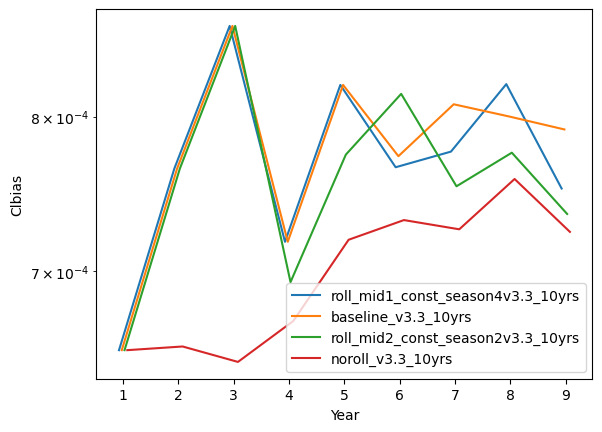

In [9]:
importlib.reload(mzmod)
import matplotlib.pyplot as plt
#mzmod.plot_meanz_metrics_by_year(v33_df, years=[3,5],num_bins=5)
mzmod.plot_metric_by_year(v33_df, stat_name='Clbias',ylog=True)#,years=[1,2,3,4,5,6,7],)


#mzmod.plot_metric_by_year(v33_df, 'Std z')

In [8]:
v33_df.to_pickle('v33_dataframe_withmeanz.pkl')

In [9]:
vec = mzmod.sensitivity(num_bins=5,fiducial_ilim=24.1)
print(vec)
# import numpy.random as random
# vec = np.linspace(2,18,17)
# print(vec)
# random.shuffle(vec)
# print(vec)

[0.046745091529873814, 0.08500551112138602, 0.11915807457810432, 0.16180047285571472, 0.2539575165815878]


In [10]:
# import matplotlib.pyplot as plt
# fig, axs = plt.subplots(5,1,sharex=True)
# x=np.linspace(0,5,100)
# axs[0].plot(x,x**2)
# axs[3].plot(x,x**2)

### Here we plot the year-by-year metric results.  We read in from the dataframe, so if it was already produced, we can skip over the previous chunk of notebook.

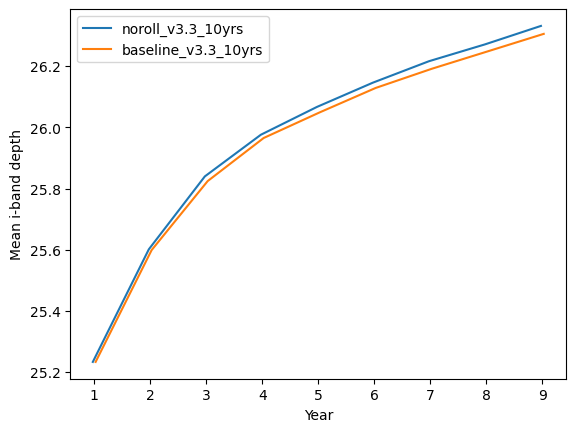

In [11]:
v33_df = pd.read_pickle('v33_dataframe_withmeanz.pkl')
mzmod.plot_metric_by_year(v33_df, 'Mean i-band depth')